# Random Forest #

<b> Table of Contents: </b>
<br> <b> [Pipeline 1](#11) </b>
<br> [1.0 Basic Model: Random Forest](#1100)
<br> [1.1 Oversampling (SMOTE)](#1101)
<br> [1.2 Undersampling (NearMiss)](#1102)
<br> [1.3 Cross Validation (Oversampling)](#1103)
<br> [1.4 Model Tuning (Hyperparameters)](#1104)
<br> [1.5 Feature Importance](#1105)
<br> <b> [Pipeline 2](#22) </b>
<br> [2.0 Basic Model: Random Forest](#2100)
<br> [2.1 Oversampling (SMOTE)](#2101)
<br> [2.2 Cross Validation (Oversampling)](#2102)
<br> [2.3 Model Tuning (Hyperparameters)](#2103)
<br> [2.4 Feature Importance](#2104)
<br> <b> [Pipeline 3](#33) </b>
<br> [3.0 Basic Model: Random Forest](#3100)
<br> [3.1 Oversampling (SMOTE)](#3101)
<br> [3.2 Cross Validation (Oversampling)](#3102) 
<br> [3.3 Model Tuning (Hyperparameters)](#3103)
<br> [3.4 Feature Importance](#3104)
<br> <b> [Results](#31005) </b>

Loading Modules

In [1]:
# import modules
import pandas as pd
import numpy as np

#Import scikit-learn dataset library
from sklearn import datasets

# Import train_test_split function
from sklearn.model_selection import train_test_split

# import oversampling and undersampling packages
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss

from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler 

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report 

# Cross Validation packages
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# import required modules for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# import module for gridsearch (to find optimal hyper-parameters)
from sklearn.model_selection import GridSearchCV

# import module (to test execution time of a codeblock to run)
import time

import warnings 

from sklearn.model_selection import StratifiedKFold
from sklearn.svm import SVC

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in

In [2]:
# packages for Receiver Operating Characteristic (ROC) with cross validation
# source: https://scikit-learn.org/0.18/auto_examples/model_selection/plot_roc_crossval.html
print(__doc__)

import numpy as np
from scipy import interp
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import plot_roc_curve

Automatically created module for IPython interactive environment


<a id = "11"> <h2> Pipeline 1 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [3]:
#Load dataset
# read csv file to a pandas dataframe
df_pipeline1 = pd.read_csv("pipeline_1.csv")

<b> show all columns in dataset

In [4]:
# show all columns in dataset
print('There are', len(df_pipeline1.columns)-1, 'features, and the target `Revenue` for pipeline 1:')
list(df_pipeline1.columns)

There are 22 features, and the target `Revenue` for pipeline 1:


['Q4',
 'VisitorType_New_Visitor',
 'Q3',
 'TrafficType_2',
 'TrafficType_8',
 'TrafficType_3',
 'PageValues_iqr_yj_zscore',
 'Q1',
 'TrafficType_13',
 'ExitRates_iqr_yj_zscore',
 'OperatingSystems_3',
 'Administrative_Duration_iqr_yj_zscore',
 'TrafficType_1',
 'SpecialDay_0.8',
 'Month_Feb',
 'Browser_6',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Informational_Duration_pp_iqr_yj_zscore',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [5]:
print('Number of rows in the dataset:', df_pipeline1.shape[0])
print('Number of columns in the dataset:', df_pipeline1.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 23


<a id = "1100"> <h2> 1.0 Basic Model Random Forest </h2> </a>

> <b> Declare Features and Target

In [6]:
# Define Features and Target variables
X = df_pipeline1.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline1.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> <b> Split the data

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019) # 70% training and 30% test

> <b> Model Development and Prediction

In [8]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3131
           1       0.65      0.53      0.58       568

    accuracy                           0.88      3699
   macro avg       0.79      0.74      0.76      3699
weighted avg       0.88      0.88      0.88      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [9]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

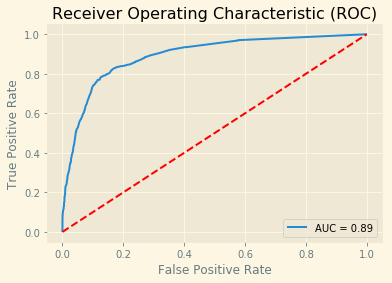

AUC score: 0.8917655566101818


In [10]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "1101"> <h2> 1.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

For more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

> <b> Oversampling applying SMOTE

In [11]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (14582, 22)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


In [12]:
# define the model
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train_res,y_train_res)

y_pred = clf1.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.91      3131
           1       0.53      0.71      0.61       568

    accuracy                           0.86      3699
   macro avg       0.74      0.80      0.76      3699
weighted avg       0.88      0.86      0.87      3699



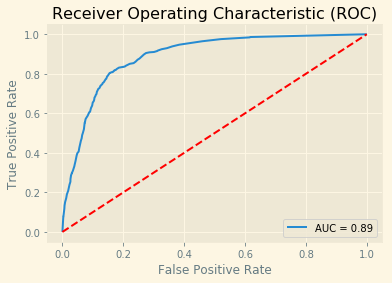

AUC score: 0.8885829348495958


In [13]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf1)

<a id = "1102"> <h2> 1.2 Undersampling (NearMiss)  </h2> </a>
We undersample the dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

Fore more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

In [14]:
# apply near miss 
nr = NearMiss(random_state=2019)
  
# resample the training dataset
X_train_miss, y_train_miss = nr.fit_sample(X_train, y_train) 
  
print('After Undersampling, the shape of train_X: {}'.format(X_train_miss.shape)) 
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_miss.shape)) 
  
print("After Undersampling, counts of label '1': {}".format(sum(y_train_miss == 1))) 
print("After Undersampling, counts of label '0': {}".format(sum(y_train_miss == 0)))

/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After Undersampling, the shape of train_X: (2680, 22)
After Undersampling, the shape of train_y: (2680,) 

After Undersampling, counts of label '1': 1340
After Undersampling, counts of label '0': 1340


In [15]:
#Create a Gaussian Classifier
clf2 = RandomForestClassifier(n_estimators=100,random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf2.fit(X_train_miss, y_train_miss)

y_pred = clf2.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.20      0.32      3131
           1       0.16      0.81      0.26       568

    accuracy                           0.29      3699
   macro avg       0.50      0.51      0.29      3699
weighted avg       0.75      0.29      0.31      3699



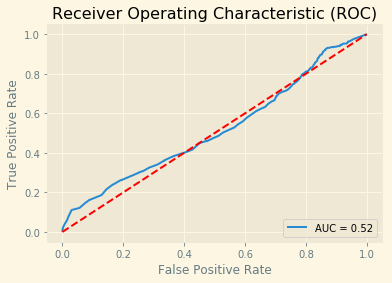

AUC score: 0.5181263242180647


In [16]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf2)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "1103"> <h2> 1.3 Cross Validation (Oversampling)  </h2> </a>

Before we tune our model's hyperparameters we want to get the baseline result of our oversampled training set.

<b> Metrics: F1, AUC scores

In [17]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.9072474  0.92182066 0.91149612 0.91414572 0.91971224 0.90592958
 0.91974255 0.90808325 0.89975584 0.91213212] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.912 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.96606727 0.97387479 0.9656008  0.96581866 0.96809318 0.96455648
 0.96823571 0.96162325 0.96068818 0.97170988] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.966626820698

<a id = "1104"> <h2> 1.4 Model Tuning (Hyperparameters) </h2> </a>
___

_Note:_ previous results with hyper-parameter tuning
<br> Best: 0.893156 using {'bootstrap': False, 'max_depth': 10, 'n_estimators': 250, 'random_state': 2019}
<br> Best: 0.908450 using {'bootstrap': False, 'max_depth': 20, 'n_estimators': 210, 'random_state': 2019}
<br> Best: 0.908450 using {'bootstrap': False, 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 200, 'random_state': 2019}
<br> Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 210, 'random_state': 2019}
<br> Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210, 'random_state': 2019}

<b> Define Grid

In [18]:
# Set the hyper-parameter grid
n_estimators = [210]
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
criterion = ['entropy']
max_depth = [20]
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
min_samples_split = [2]
min_samples_leaf = [1]
random_state = [2019]
bootstrap = [True, False]
max_features = ['auto']

param_grid = dict(n_estimators = n_estimators,
                  criterion = criterion,
                  max_depth = max_depth, 
                  min_samples_split = min_samples_split,
                  min_samples_leaf= min_samples_leaf,
                  random_state = random_state,
                  bootstrap = bootstrap,
                 max_features = max_features)

<b> Hyper-parameter tweaking on oversampled training set

In [19]:
# set the start time
start = time.time()

# define the model
clf = RandomForestClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_n_estimators = grid.best_estimator_.get_params()['n_estimators']
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']
optimal_min_samples_split = grid.best_estimator_.get_params()['min_samples_split']
optimal_min_samples_leaf =  grid.best_estimator_.get_params()['min_samples_leaf']
optimal_random_state = grid.best_estimator_.get_params()['random_state']
optimal_bootstrap = grid.best_estimator_.get_params()['bootstrap']
optimal_max_features = grid.best_estimator_.get_params()['max_features']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210, 'random_state': 2019}
--- Execution time: ---
--- 75519.439ms. --- 
--- 75.51943850517273 seconds ---
--- 1.2586573084195456 minutes ---


Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210, 'random_state': 2019}
<br> --- Execution time: ---
<br> --- 75519.439ms. --- 
<br> --- 75.51943850517273 seconds ---
<br> --- 1.2586573084195456 minutes ---

<b> Applying the optimal hyper-parameters on oversampled training set

In [20]:
# apply the optimal hyper-parameters to the Random Forest Model
clf3 = RandomForestClassifier(n_estimators = optimal_n_estimators,
                              criterion = optimal_criterion,
                              max_depth = optimal_max_depth, 
                              min_samples_split = optimal_min_samples_split,
                              min_samples_leaf = optimal_min_samples_leaf,
                              random_state = optimal_random_state,
                              bootstrap = optimal_bootstrap,
                              max_features = optimal_max_features)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.89      0.92      3131
           1       0.55      0.71      0.62       568

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [21]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.90871989 0.91979385 0.91701097 0.92106237 0.91563464 0.90120333
 0.91289868 0.90878572 0.9011944  0.915592  ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9122 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.96842425 0.97657319 0.96904825 0.97187726 0.97038662 0.96762551
 0.97038226 0.96856016 0.96374234 0.97529166] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9702 



<b> Cross Validation Using KFold </b>
<br> For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Cross validation on X and Y with our optimal hyperparameters for our model

In [22]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')

result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.89018337 0.87694193 0.86937445 0.89973332 0.88289327 0.90268942
 0.88033306 0.87008448 0.87528942 0.89498617] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8843 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.89690776 0.89440803 0.90268877 0.92416902 0.91167162 0.92197235
 0.93145843 0.89477052 0.906141   0.92333343] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9108 



<a id = "1105"> <h2> 1.5 Feature Importance </h2> </a>

In [23]:
feature_imp = pd.Series(clf3.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
feature_imp

PageValues_iqr_yj_zscore                   0.462939
ExitRates_iqr_yj_zscore                    0.167013
Administrative_Duration_iqr_yj_zscore      0.098885
Q4                                         0.044706
Informational_Duration_pp_iqr_yj_zscore    0.043870
OperatingSystems_3                         0.037820
TrafficType_2                              0.022164
VisitorType_New_Visitor                    0.021054
TrafficType_3                              0.020153
Q3                                         0.019457
Q1                                         0.015689
TrafficType_1                              0.014260
TrafficType_13                             0.008939
TrafficType_8                              0.007336
SpecialDay_0.8                             0.003956
TrafficType_20                             0.003848
Browser_6                                  0.003140
SpecialDay_0.4                             0.001991
Browser_12                                 0.001733
Month_Feb   

<b> Visualizing Important Features

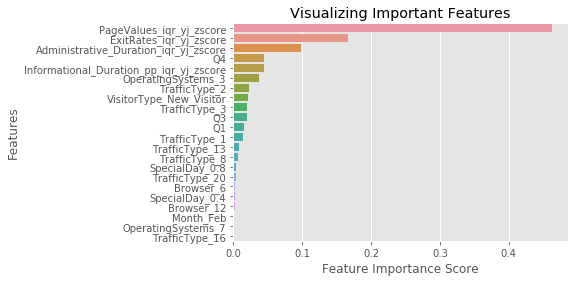

In [24]:
%matplotlib inline
plt.style.use('ggplot')

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<a id = "22"> <h2> Pipeline 2 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [39]:
#Load dataset
# read csv file to a pandas dataframe
df_pipeline2 = pd.read_csv("pipeline_2.csv")

<b> show all columns in dataset

In [40]:
# show all columns in dataset
print('There are', len(df_pipeline2.columns)-1, 'features, and the target `Revenue` for pipeline 2:')
list(df_pipeline2.columns)

There are 21 features, and the target `Revenue` for pipeline 2:


['TrafficType_15',
 'Month_Nov',
 'Administrative_Duration_mm_yj_stdev',
 'VisitorType_New_Visitor',
 'Informational_mm_yj_stdev',
 'TrafficType_2',
 'TrafficType_3',
 'ProductRelated_mm_yj_stdev',
 'PageValues_mm_yj_stdev',
 'Month_May',
 'TrafficType_13',
 'OperatingSystems_3',
 'TrafficType_1',
 'add_exit_bounce_rates_mm_yj_stdev',
 'Month_Mar',
 'TrafficType_18',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'TrafficType_12',
 'Browser_12',
 'Revenue']

In [41]:
print('Number of rows in the dataset:', df_pipeline2.shape[0])
print('Number of columns in the dataset:', df_pipeline2.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 22


<a id = "2100"> <h2> 2.0 Basic Model Random Forest </h2> </a>

> <b> Declare Features and Target

In [42]:
# Define Features and Target variables
X = df_pipeline2.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline2.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> <b> Split the data

In [43]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019) # 70% training and 30% test

> <b> Model Development and Prediction

In [44]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94      3131
           1       0.69      0.55      0.61       568

    accuracy                           0.89      3699
   macro avg       0.80      0.75      0.78      3699
weighted avg       0.89      0.89      0.89      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [45]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

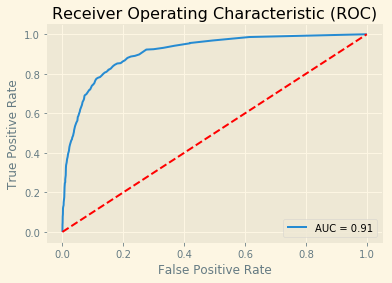

AUC score: 0.9098570181870527


In [46]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "2101"> <h2> 2.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

For more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

> <b> Oversampling applying SMOTE

In [47]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 21)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [48]:
# define the model
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train_res,y_train_res)

y_pred = clf1.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.90      0.92      3131
           1       0.57      0.72      0.64       568

    accuracy                           0.88      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.88      0.88      3699



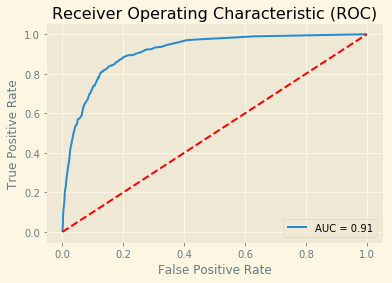

AUC score: 0.9118551535980495


In [49]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf1)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "2102"> <h2> 2.2 Cross Validation (Oversampling)  </h2> </a>

Before we tune our model's hyperparameters we want to get the baseline result of our oversampled training set.

<b> Metrics: F1, AUC scores

In [50]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.91617336 0.93691561 0.93072034 0.94713613 0.92862049 0.93480897
 0.93755122 0.92731682 0.92313687 0.93274591] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9315 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.98087073 0.98426249 0.97598552 0.98153409 0.98303868 0.98055367
 0.98462038 0.97982333 0.97806475 0.98064692] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.98094005552

<a id = "2103"> <h2> 2.3 Model Tuning (Hyperparameters) </h2> </a>
___

<b> Define Grid

In [51]:
# Set the hyper-parameter grid
n_estimators = [210]
criterion = ['entropy']
max_depth = [20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_state = [2019]
bootstrap = [False]
max_features = ['auto']

# from pipeline 1 as a reference:
# Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 210, 'random_state': 2019} 

param_grid = dict(n_estimators = n_estimators,
                  criterion = criterion,
                  max_depth = max_depth, 
                  min_samples_split = min_samples_split,
                  min_samples_leaf= min_samples_leaf,
                  random_state = random_state,
                  bootstrap = bootstrap,
                  max_features = max_features)

<b> Hyper-parameter tweaking on oversampled training set

In [52]:
# set the start time
start = time.time()

# define the model
clf = RandomForestClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_n_estimators = grid.best_estimator_.get_params()['n_estimators']
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']
optimal_min_samples_split = grid.best_estimator_.get_params()['min_samples_split']
optimal_min_samples_leaf =  grid.best_estimator_.get_params()['min_samples_leaf']
optimal_random_state = grid.best_estimator_.get_params()['random_state']
optimal_bootstrap = grid.best_estimator_.get_params()['bootstrap']
optimal_max_features = grid.best_estimator_.get_params()['max_features']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.930189 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210, 'random_state': 2019}
--- Execution time: ---
--- 82196.946ms. --- 
--- 82.19694590568542 seconds ---
--- 1.3699490984280904 minutes ---


<br> _Note:_ Optimal hyper-parameters
Best: 0.930189 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 210, 'random_state': 2019}
<br> --- Execution time: ---
<br> --- 82196.946ms. --- 
<br> --- 82.19694590568542 seconds ---
<br> --- 1.3699490984280904 minutes ---

<b> Applying the optimal hyper-parameters on oversampled training set

In [53]:
# apply the optimal hyper-parameters to the Random Forest Model
clf3 = RandomForestClassifier(n_estimators = optimal_n_estimators,
                              criterion = optimal_criterion,
                              max_depth = optimal_max_depth, 
                              min_samples_split = optimal_min_samples_split,
                              min_samples_leaf = optimal_min_samples_leaf,
                              random_state = optimal_random_state,
                              bootstrap = optimal_bootstrap,
                              max_features = optimal_max_features)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3131
           1       0.57      0.71      0.63       568

    accuracy                           0.87      3699
   macro avg       0.76      0.81      0.78      3699
weighted avg       0.89      0.87      0.88      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [54]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.92100953 0.93759568 0.93072321 0.94437862 0.92658357 0.94168107
 0.93755922 0.92592955 0.92036101 0.93478816] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9321 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.9816592  0.98602133 0.97963067 0.98258153 0.98481076 0.98197529
 0.98569788 0.9818263  0.97849475 0.9818813 ] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9825 



<b> Cross Validation Using KFold </b>
<br> For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Cross validation on X and Y with our optimal hyperparameters for our model

In [55]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')

result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.88483129 0.88614592 0.89104629 0.89328366 0.88943046 0.89933388
 0.89731823 0.88379795 0.89149793 0.89761045] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8914 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.91419658 0.90797896 0.91583495 0.93737864 0.91715366 0.92299103
 0.94289314 0.90924855 0.92914382 0.93649436] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9233 



<a id = "2104"> <h2> 2.4 Feature Importance </h2> </a>

In [56]:
feature_imp = pd.Series(clf3.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
feature_imp

PageValues_mm_yj_stdev                 4.675577e-01
add_exit_bounce_rates_mm_yj_stdev      1.338513e-01
ProductRelated_mm_yj_stdev             1.135191e-01
Administrative_Duration_mm_yj_stdev    1.011906e-01
Informational_mm_yj_stdev              5.054380e-02
Month_Nov                              3.653124e-02
Month_May                              1.718632e-02
TrafficType_2                          1.357267e-02
VisitorType_New_Visitor                1.327583e-02
OperatingSystems_3                     1.191766e-02
Month_Mar                              1.177602e-02
TrafficType_3                          8.657522e-03
TrafficType_1                          7.848020e-03
TrafficType_13                         4.941903e-03
TrafficType_8                          3.766868e-03
SpecialDay_0.8                         2.244279e-03
Month_Feb                              8.281810e-04
Browser_12                             5.693493e-04
TrafficType_15                         2.139371e-04
TrafficType_

<b> Visualizing Important Features

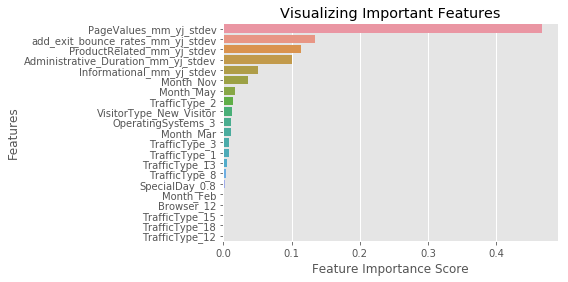

In [57]:
%matplotlib inline
plt.style.use('ggplot')

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<a id = "33"> <h2> Pipeline 3 </h2> </a>
___

<b> read csv file to a pandas dataframe

In [58]:
#Load dataset
# read csv file to a pandas dataframe
df_pipeline3 = pd.read_csv("pipeline_3.csv")

<b> show all columns in dataset

In [59]:
# show all columns in dataset
print('There are', len(df_pipeline3.columns)-1, 'features, and the target `Revenue` for pipeline 3:')
list(df_pipeline3.columns)

There are 23 features, and the target `Revenue` for pipeline 3:


['Administrative_yj_stdev_zscore',
 'Month_Nov',
 'VisitorType_New_Visitor',
 'TrafficType_2',
 'Month_May',
 'TrafficType_3',
 'add_exit_bounce_rates_yj_stdev_zscore',
 'TrafficType_13',
 'PageValues_yj_stdev_zscore',
 'OperatingSystems_3',
 'TrafficType_1',
 'Month_Mar',
 'TrafficType_8',
 'SpecialDay_0.8',
 'Month_Feb',
 'Month_Dec',
 'SpecialDay_0.4',
 'TrafficType_20',
 'Month_Oct',
 'Region_1',
 'Browser_12',
 'OperatingSystems_7',
 'TrafficType_16',
 'Revenue']

In [60]:
print('Number of rows in the dataset:', df_pipeline3.shape[0])
print('Number of columns in the dataset:', df_pipeline3.shape[1])

Number of rows in the dataset: 12330
Number of columns in the dataset: 24


<a id = "3100"> <h2> 3.0 Basic Model Random Forest </h2> </a>

> <b> Declare Features and Target

In [72]:
# Define Features and Target variables
X = df_pipeline3.iloc[:, :-1] # Features is all columns in the dataframe except the last column
Y = df_pipeline3.iloc[:, -1] # Target is the last column in the dataframe: 'Revenue'

> <b> Split the data

In [73]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=2019) # 70% training and 30% test

> <b> Model Development and Prediction

In [74]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3131
           1       0.65      0.55      0.60       568

    accuracy                           0.89      3699
   macro avg       0.79      0.75      0.77      3699
weighted avg       0.88      0.89      0.88      3699



<b> ROC Curve with AUC score - Basic model </b> (before oversampling/undersampling)

In [75]:
# define a function to plot the roc_curve and AUC score using variables: X_test and y_test
def roc_curve(X_test=X_test, y_test=y_test, model=clf):
    # set the style of the graph
    plt.style.use('Solarize_Light2')

    # predict_proba gives you the probabilities for the target (0 and 1 in your case) in array form in dimension (N,2). 
    # The first index refers to the probability that the data belong to class 0, and the second refers to the probability that the data belong to class 1. 
    # we define a variable with an array of the probabilities that each observation belongs to class 1 (with [:,1], where model.predict_proba(X_test)[:,0] refers to the array it belongs to class 0)
    y_pred_proba = model.predict_proba(X_test)[:,1]

    # define false positive rate (fpr) and the true positive rate (tpr)
    fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

    # Compute Area Under the Receiver Operating Characteristic Curve (ROC AUC) from prediction scores.
    # source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # plot on the X-axis: the false positive rate
    # plot on the Y-axis: the true positive rate
    # with the legend having the auc score
    plt.plot(fpr,tpr,label='AUC = %0.2f' % auc)
    # positioning of the legend
    plt.legend(loc=4)
    # define the title of the plot
    plt.title('Receiver Operating Characteristic (ROC)')
    # define the y axis label
    plt.ylabel('True Positive Rate')
    # define the x axis label
    plt.xlabel('False Positive Rate')
    # plot a straight dashed line in the color red
    plt.plot([0, 1], [0, 1],'r--')
    # show the plot
    plt.show()
    # print out full AUC score
    print('AUC score:', auc)

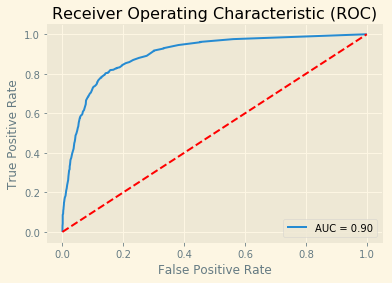

AUC score: 0.8981561036612521


In [76]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf)

<a id = "3101"> <h2> 3.1 Oversampling (SMOTE) </h2> </a>
We oversample the <b> training </b> dataset, because the classes within our target variable 'Revenue' are imbalanced:
* class 0: 84.53%
* class 1: 15.47%

For more information, click on detailed information from Prof. Jie Tao [link](https://github.com/DrJieTao/ba545-docs/blob/master/competition2/handling_imbalanced_data_part2.ipynb)

> <b> Oversampling applying SMOTE

In [77]:
sm = SMOTE(random_state = 2019) 
X_train_res, y_train_res = sm.fit_sample(X_train, y_train) 

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape)) 
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape)) 
  
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1))) 
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, the shape of train_X: (14582, 23)
After OverSampling, the shape of train_y: (14582,) 

After OverSampling, counts of label '1': 7291
After OverSampling, counts of label '0': 7291


/opt/tljh/user/lib/python3.6/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [78]:
# define the model
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf1 = RandomForestClassifier(n_estimators=100, random_state=2019)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf1.fit(X_train_res,y_train_res)

y_pred = clf1.predict(X_test)

#check the predictive performance using the actual and predicted values
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3131
           1       0.56      0.70      0.62       568

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.88      3699



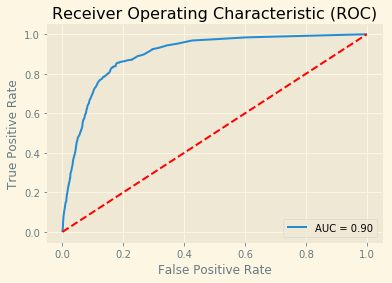

AUC score: 0.898195464707761


In [79]:
# apply function to plot the ROC Curve
roc_curve(X_test=X_test, y_test=y_test, model=clf1)

## Cross Validation Using KFold </b>
For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<a id = "3102"> <h2> 3.2 Cross Validation (Oversampling)  </h2> </a>

Before we tune our model's hyperparameters we want to get the baseline result of our oversampled training set.

<b> Metrics: F1, AUC scores

In [80]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

result = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='accuracy')
result_f1_weighted = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc = cross_val_score(clf1, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC score results:')
print('--------------------------------------------------------------------------')
print(result_auc, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC score results:')
print('--------------------------------------------------------------------------')
print('avg AUC score', result_auc.mean())

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.91825133 0.93211373 0.92523875 0.92793903 0.93067138 0.92655385
 0.92933684 0.92044644 0.91968457 0.9231431 ] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9253 

--------------------------------------------------------------------------
All the AUC score results:
--------------------------------------------------------------------------
[0.97412685 0.97843538 0.97563814 0.97138086 0.9755711  0.97048286
 0.98118836 0.97468118 0.97253507 0.97562284] 

--------------------------------------------------------------------------
Average of all the AUC score results:
--------------------------------------------------------------------------
avg AUC score 0.97496626360

<a id = "3103"> <h2> 3.3 Model Tuning (Hyperparameters) </h2> </a>
___

<b> Define Grid

In [81]:
# Set the hyper-parameter grid
n_estimators = [210]
criterion = ['entropy']
max_depth = [20]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
random_state = [2019]
bootstrap = [False]
max_features = ['auto']

# from pipeline 1 as a reference:
# Best: 0.908655 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'n_estimators': 210, 'random_state': 2019} 

param_grid = dict(n_estimators = n_estimators,
                  criterion = criterion,
                  max_depth = max_depth, 
                  min_samples_split = min_samples_split,
                  min_samples_leaf= min_samples_leaf,
                  random_state = random_state,
                  bootstrap = bootstrap,
                  max_features = max_features)

<b> Hyper-parameter tweaking on oversampled training set

In [82]:
# set the start time
start = time.time()

# define the model
clf = RandomForestClassifier()

# Create a grid search object
grid = GridSearchCV(estimator=clf, param_grid=param_grid, cv = 3, n_jobs=-1)

# Fit the grid search (Fitting your model to the training data)
grid_result = grid.fit(X_train_res, y_train_res)

# define each optimal parameter as a new variable
optimal_n_estimators = grid.best_estimator_.get_params()['n_estimators']
optimal_criterion = grid.best_estimator_.get_params()['criterion']
optimal_max_depth = grid.best_estimator_.get_params()['max_depth']
optimal_min_samples_split = grid.best_estimator_.get_params()['min_samples_split']
optimal_min_samples_leaf =  grid.best_estimator_.get_params()['min_samples_leaf']
optimal_random_state = grid.best_estimator_.get_params()['random_state']
optimal_bootstrap = grid.best_estimator_.get_params()['bootstrap']
optimal_max_features = grid.best_estimator_.get_params()['max_features']

# Summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# get the time it takes for the gridsearch to run
# source: https://blog.softhints.com/python-test-performance-and-measure-time-elapsed-in-seconds/
# set the end time
end = time.time()

# get the elapsed execution time
execution_time = end - start
print("--- Execution time: ---")
print ('--- %0.3fms. --- ' % ( execution_time*1000.))
print("--- %s seconds ---" % (execution_time))
print("--- %s minutes ---" % (execution_time/60))

Best: 0.920862 using {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 20, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 210, 'random_state': 2019}
--- Execution time: ---
--- 32379.078ms. --- 
--- 32.37907814979553 seconds ---
--- 0.5396513024965922 minutes ---


<b> Applying the optimal hyper-parameters on oversampled training set

In [83]:
# apply the optimal hyper-parameters to the Random Forest Model
clf3 = RandomForestClassifier(n_estimators = optimal_n_estimators,
                              criterion = optimal_criterion,
                              max_depth = optimal_max_depth, 
                              min_samples_split = optimal_min_samples_split,
                              min_samples_leaf = optimal_min_samples_leaf,
                              random_state = optimal_random_state,
                              bootstrap = optimal_bootstrap,
                              max_features = optimal_max_features)

# fit/train the model with oversampled training set
clf3.fit(X_train_res, y_train_res)

# predict the testing set
y_pred=clf3.predict(X_test)

# print out the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92      3131
           1       0.55      0.70      0.62       568

    accuracy                           0.87      3699
   macro avg       0.75      0.80      0.77      3699
weighted avg       0.88      0.87      0.87      3699



<b> Average Weighted F1 score and Average AUC score with Cross validation

In [84]:
# ignore warnings
warnings.filterwarnings("ignore")

# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)

# note: only a single metric is permitted for parameter 'scoring'
# for all parameters for scoring, see source:https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
result_f1_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X_train_res, y_train_res, cv=kfold, scoring='roc_auc')
print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.92097757 0.9355227  0.92523285 0.9272299  0.92928654 0.92792097
 0.92453629 0.91633822 0.91968457 0.93136873] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.9258 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.97558727 0.9828043  0.97883988 0.97932429 0.97784102 0.97476371
 0.98122977 0.97620555 0.97460223 0.97970138] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9781 



<b> Cross Validation Using KFold </b>
<br> For more information on the topic, please click the following [link](https://stackabuse.com/cross-validation-and-grid-search-for-model-selection-in-python/).
<br> The details of the package are noted [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html).

<b> Cross validation on X and Y with our optimal hyperparameters for our model

In [85]:
# Build the k-fold cross-validator
k_fold_split = 10
kfold = KFold(n_splits=k_fold_split, random_state=2019, shuffle=True)
result = cross_val_score(clf3, X, Y, cv=kfold, scoring='accuracy')

result_f1_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='f1_weighted')
result_auc_weighted = cross_val_score(clf3, X, Y, cv=kfold, scoring='roc_auc')

print('--------------------------------------------------------------------------')
print('All the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(result_f1_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the weighted f1 results:')
print('--------------------------------------------------------------------------')
print(round(result_f1_weighted.mean(), 4), '\n')

print('--------------------------------------------------------------------------')
print('All the AUC scores:')
print('--------------------------------------------------------------------------')
print(result_auc_weighted, '\n')

print('--------------------------------------------------------------------------')
print('Average of all the AUC scores:')
print('--------------------------------------------------------------------------')
print(round(result_auc_weighted.mean(), 4), '\n')

# reset the warnings for future code
warnings.resetwarnings()

--------------------------------------------------------------------------
All the weighted f1 results:
--------------------------------------------------------------------------
[0.89098766 0.87782478 0.87922547 0.89539576 0.88972769 0.89108555
 0.89835007 0.87534693 0.88034604 0.89393866] 

--------------------------------------------------------------------------
Average of all the weighted f1 results:
--------------------------------------------------------------------------
0.8872 

--------------------------------------------------------------------------
All the AUC scores:
--------------------------------------------------------------------------
[0.91024725 0.89853631 0.91242014 0.9286623  0.91174993 0.92499484
 0.93424485 0.91705202 0.91165703 0.92795139] 

--------------------------------------------------------------------------
Average of all the AUC scores:
--------------------------------------------------------------------------
0.9178 



<a id = "3104"> <h2> 3.4 Feature Importance </h2> </a>

In [86]:
feature_imp = pd.Series(clf3.feature_importances_, index=list(X.columns)).sort_values(ascending=False)
feature_imp

PageValues_yj_stdev_zscore               0.454621
add_exit_bounce_rates_yj_stdev_zscore    0.164840
Administrative_yj_stdev_zscore           0.106375
Month_Nov                                0.046170
OperatingSystems_3                       0.038459
Month_May                                0.023925
VisitorType_New_Visitor                  0.021957
Region_1                                 0.020989
TrafficType_3                            0.020161
TrafficType_2                            0.019653
Month_Mar                                0.017424
Month_Dec                                0.014759
TrafficType_1                            0.012814
TrafficType_13                           0.010380
Month_Oct                                0.009470
TrafficType_8                            0.005595
SpecialDay_0.8                           0.004256
TrafficType_20                           0.003423
SpecialDay_0.4                           0.001874
Month_Feb                                0.001111


<b> Visualizing Important Features

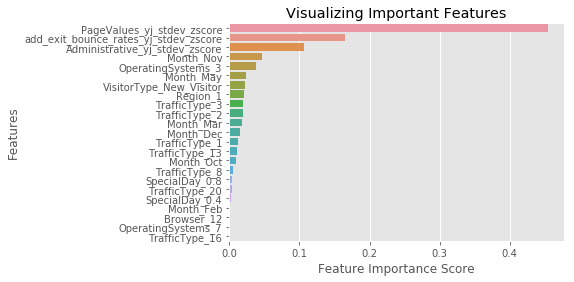

In [87]:
%matplotlib inline
plt.style.use('ggplot')

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

<a id = "31005"> <h2> Results </h2> </a>

<b> Left align all markdown tables

In [88]:
%%html
<style>
    table {
        display: inline-block
    }
</style>

### Pipeline 1 Results </b>
_Note:_ tool used for Excel table to markdown conversion, namely: https://tableconvert.com/

| Model                                                             | weighted avg F1\-score | AUC score |
|-------------------------------------------------------------------|------------------------|-----------|
| Basic Model                                                       | 0\.80                  | 0\.893    |
| Oversampled Model \(SMOTE\)                                       | 0\.87                  | 0\.890    |
| Undersampled Model \(Nearmiss\)                                   | 0\.87                  | 0\.889    |
| Cross validation Oversampled Model                                | 0\.91                  | 0\.965    |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. And Oversampling\) | 0\.87                  | 0\.961    |   |   |   |   |   |

### Pipeline 2 Results </b>

| Model                                                             | weighted avg F1\-score | AUC score |
|-------------------------------------------------------------------|------------------------|-----------|
| Basic Model                                                       | 0\.88                  | 0\.891    |
| Oversampled Model \(SMOTE\)                                       | 0\.88                  | 0\.912    |
| Cross validation Oversampled Model                                | 0\.9321                | 0\.980    |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. And Oversampling\) | 0\.88                  | 0\.9698   |   |   |   |   |   |

<b> Take-away: </b> For pipeline 2 the best results are with training our model with oversampling using SMOTE and applying cross-validation for a more reliable result.

### Pipeline 3 Results </b>

| Model                                                             | weighted avg F1\-score | AUC score |
|-------------------------------------------------------------------|------------------------|-----------|
| Basic Model                                                       | 0\.88                  | 0\.902    |
| Oversampled Model \(SMOTE\)                                       | 0\.88                  | 0\.90007  |
| Cross validation Oversampled Model                                | 0\.92                  | 0\.975    |
| Optimal Hyper\-Parameters \(incl\. Cross Val\. And Oversampling\) | 0\.88                  | 0\.970    |   |   |   |   |


<b> Conclusion: </b> 


<br> Pipelines have very similar results for the best model with cross validation using oversampling (SMOTE) and the 'optimal' parameters for the linear model, based on the weighted avg F1-score and AUC score.
<br> The highest average scores (with Cross Validation, Oversampling, Model Tuning) are with pipeline 2, having a weighted avg F1-score of 0.9321 and a AUC score of 0.98.